- 이미지를 분류할 때 이미 잘 학습되어 있는 모델을 사용한다는 아이디어를 떠올릴 수 있습니다.
- 사전학습 모델인 Backbone 모델의 종류와 개념을 알고, Transfer Learning의 개념을 설명할 수 있습니다.
- VGG, ResNet과 같은 기본적인 Backbone 모델을 불러와서 사용할 수 있습니다.
- Backbone 모델을 원하는 레이어(layer)만큼 새로 학습시켜서 사용할 수 있습니다.
- `Backbone 모델을 Transfer Learning 시킴으로써 원하는 이미지를 분류시킬 수 있습니다.

In [1]:
import warnings
warnings.filterwarnings("ignore")
print("완료!")

완료!


In [2]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [3]:
import tensorflow_datasets as tfds

tfds.__version__

'4.9.7'

[[tensorflow_datasets](https://www.tensorflow.org/datasets/catalog/overview)](https://www.tensorflow.org/datasets/catalog/overview)

In [5]:
import os
# Unicode 경로를 사용하여 디렉토리 생성
os.makedirs(r"H:\내 드라이브\datasets\cats_vs_dogs\PetImages", exist_ok=True)

In [19]:
dataset_path = 'H:\내 드라이브\datasets\cats_vs_dogs'
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    name='cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    data_dir=dataset_path,
    download=False,
    with_info=True,
    as_supervised=True,
)

In [16]:
import matplotlib.pyplot as plt


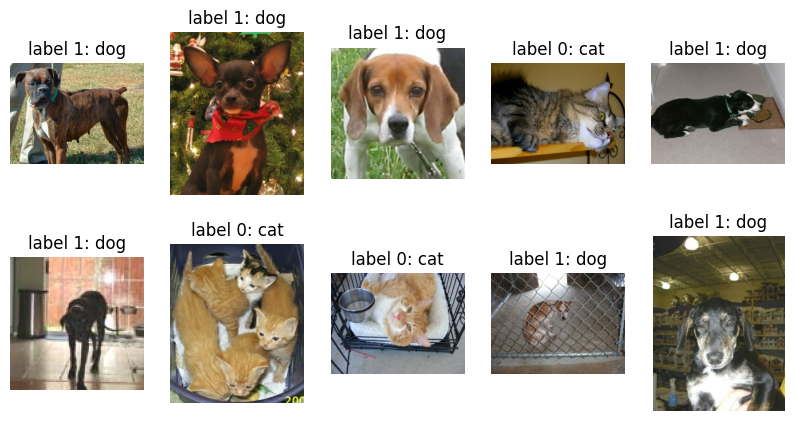

In [20]:
plt.figure(figsize=(10, 5))

get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(raw_train.take(10)):  # 10개의 데이터를 가져 옵니다.
    plt.subplot(2, 5, idx+1)
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}')
    plt.axis('off')

In [21]:
IMG_SIZE = 160 # 리사이징할 이미지의 크기

def format_example(image, label):
    image = tf.cast(image, tf.float32)  # image=float(image)같은 타입캐스팅의  텐서플로우 버전입니다.
    image = (image/127.5) - 1 # 픽셀값의 scale 수정
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

In [22]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

print(train)
print(validation)
print(test)

<_MapDataset element_spec=(TensorSpec(shape=(160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_MapDataset element_spec=(TensorSpec(shape=(160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_MapDataset element_spec=(TensorSpec(shape=(160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


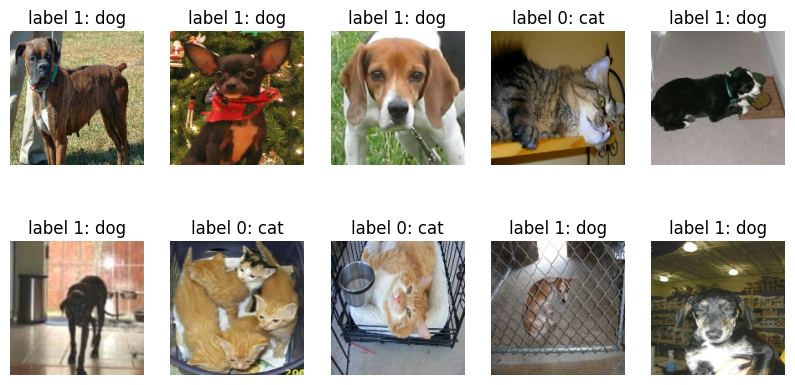

In [23]:
plt.figure(figsize=(10, 5))


get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(train.take(10)):
    plt.subplot(2, 5, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}')
    plt.axis('off')

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [25]:
model = Sequential([
    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dense(units=2, activation='softmax')
])

print("슝~")

슝~


In [26]:
model = Sequential([
    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dense(units=2, activation='softmax')
])

print("슝~")

슝~


In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 160, 160, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 80, 80, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 80, 80, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 40, 40, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 40, 40, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    13,107,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,132,322 (50.10 MB)

 Trainable params: 13,132,322 (50.10 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])


한 스텝에 학습시킬 데이터의 개수인 BATCH_SIZE와 학습 데이터를 적절히 섞어줄 SHUFFLE_BUFFER_SIZE를 설정해주겠습니다.

In [28]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

BATCH_SIZE에 따라 32개의 데이터를 랜덤으로 뿌려줄 train_batches, validation_batches, test_batches를 만들어 주겠습니다.  
train_batches는 모델이 끊임없이 학습될 수 있도록 전체 데이터에서 32개를 랜덤으로 뽑아 계속 제공해 줄 것입니다.

In [29]:
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

train_batches에서 하나의 batch만 꺼내 데이터를 확인해볼까요?






In [30]:
for image_batch, label_batch in train_batches.take(1):
    break

image_batch.shape, label_batch.shape

(TensorShape([32, 160, 160, 3]), TensorShape([32]))

본격적으로 모델을 학습시켜보기 전에, 초기 모델의 성능은 어떤지 확인해 보겠습니다.   
validation(검증)을 하기 위한 데이터셋인 validation_batches를 이용해 20번의 예측을 해 보고, 평균 loss와 평균 accuracy를 확인해 보겠습니다.






In [41]:
validation_steps = 20
loss0, accuracy0 = model.evaluate(validation_batches, steps=validation_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 152ms/step - accuracy: 0.4787 - loss: 0.6971
initial loss: 0.70
initial accuracy: 0.50


loss는 0.7이, accuracy는 약 50%가 나왔군요.

여기서 loss는 말 그대로 "손실"이라는 뜻으로, 얼마나 모델이 틀렸는지 나타냅니다. 따라서 loss는 낮을수록 좋은 것이죠. 또한 accuracy는 몇 퍼센트의 정확도를 보이느냐 에 대한 수치입니다. 우리는 강아지와 고양이를 분류하려고 하는데, 두 장 중 하나를 찍어도 50%는 나올 테니 지금 모델은 전혀 의미 없는 예측을 하는 것이라고 할 수 있습니다.

그러면 10 epoch를 학습시켜서 정확도가 어떻게 변하는지 확인해 보겠습니다. 아래 코드는 학습 환경에 따라 약 10~20분 내외가 걸릴 수 있습니다. (colab P100 GPU 기준 약 7분 내외)

In [42]:
EPOCHS = 10
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 127s 217ms/step - accuracy: 0.6070 - loss: 0.6613 - val_accuracy: 0.7223 - val_loss: 0.5612
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 98s 166ms/step - accuracy: 0.7388 - loss: 0.5262 - val_accuracy: 0.6969 - val_loss: 0.5832
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 99s 169ms/step - accuracy: 0.7746 - loss: 0.4664 - val_accuracy: 0.7752 - val_loss: 0.4772
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 99s 168ms/step - accuracy: 0.8120 - loss: 0.4175 - val_accuracy: 0.7807 - val_loss: 0.4622
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 99s 169ms/step - accuracy: 0.8354 - loss: 0.3707 - val_accuracy: 0.7678 - val_loss: 0.4853
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 101s 173ms/step - accuracy: 0.8565 - loss: 0.3273 - val_accuracy: 0.7842 - val_loss: 0.4644
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 97s 166ms/step - accuracy: 0.8828 - loss: 0.2789 - val_accuracy: 0.7627 - val_loss: 0.5467
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 98s 168ms/step - accuracy: 0.9130 - loss:

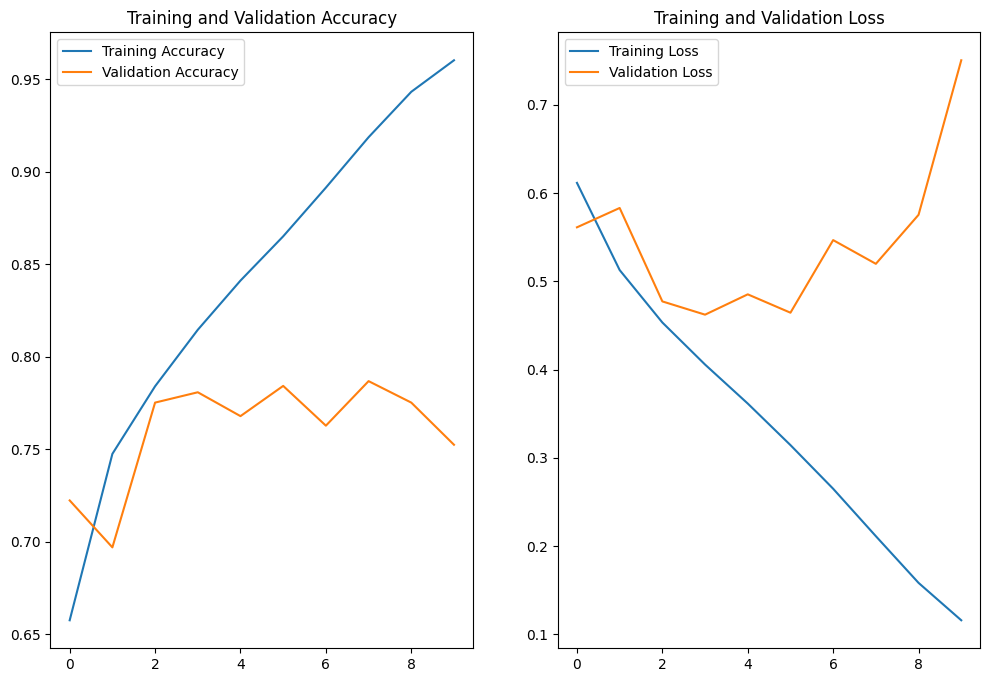

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

모델의 예측 결과를 확인하고 싶을 때는 다음과 같이 model.predict를 활용

In [37]:
for image_batch, label_batch in test_batches.take(1):
    images = image_batch
    labels = label_batch
    predictions = model.predict(image_batch)
    break

predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[0.44563237, 0.55436754],
       [0.44595146, 0.55404854],
       [0.4651113 , 0.5348887 ],
       [0.4596908 , 0.5403092 ],
       [0.45230564, 0.5476944 ],
       [0.46686736, 0.5331327 ],
       [0.48038742, 0.51961255],
       [0.4143475 , 0.58565253],
       [0.41698137, 0.58301866],
       [0.4526738 , 0.5473262 ],
       [0.48200995, 0.51799005],
       [0.39957732, 0.6004227 ],
       [0.44310263, 0.55689734],
       [0.48264575, 0.51735425],
       [0.41542873, 0.58457136],
       [0.41644529, 0.58355474],
       [0.42701843, 0.57298154],
       [0.4199172 , 0.58008283],
       [0.47926232, 0.52073765],
       [0.4537907 , 0.5462093 ],
       [0.49616808, 0.5038319 ],
       [0.429486  , 0.570514  ],
       [0.4178829 , 0.58211714],
       [0.48866224, 0.5113378 ],
       [0.46298245, 0.5370176 ],
       [0.46814618, 0.5318539 ],
       [0.46120584, 0.53879416],
       [0.4761708 , 0.5238291 ],
       [0.43266445, 0.5673356 ],
       [0.4600478 , 0.53995216],
       [0.

predictions가 엄청난 소수점 값들로 이루어져 있군요. 이 값은 모델이 판단한 [고양이일 확률, 강아지의 확률]인데, [1.0, 0.0]에 가까울수록 label이 0인 고양이로, [0.0, 1.0]에 가까울수록 label이 1인 강아지로 예측했다고 볼 수 있습니다.

즉 고양이일 확률이 더 높으면 고양이로, 그렇지 않으면 강아지로 예측했다고 할 수 있겠군요.

prediction 값들을 실제 추론한 라벨(고양이:0, 강아지:1)로 변환해 보겠습니다. 실제로 모델이 각 이미지를 강아지라고 판단했는지, 고양이로 판단했는지 보기 위해서요!

In [38]:
import numpy as np

predictions = np.argmax(predictions, axis=1)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

이제 32장의 image들과 32개의 label, 그리고 32개의 prediction을 얻었으니 각각을 시각화해서 확인하겠습니다.






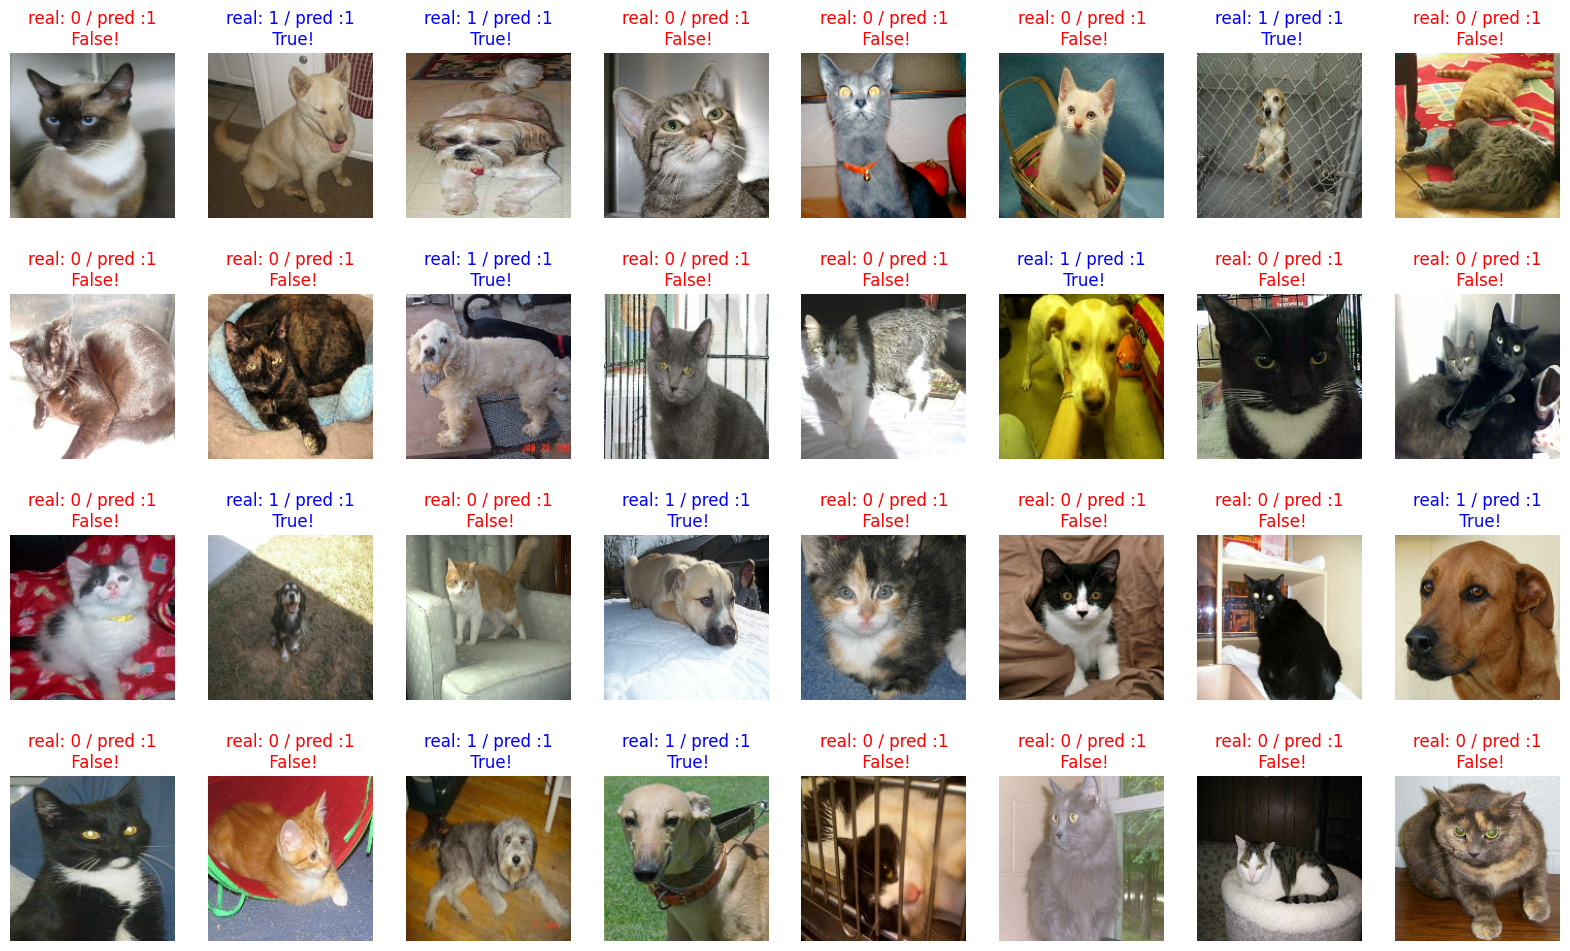

In [33]:
plt.figure(figsize=(20, 12))

for idx, (image, label, prediction) in enumerate(zip(images, labels, predictions)):
    plt.subplot(4, 8, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    correct = label == prediction
    title = f'real: {label} / pred :{prediction}\n {correct}!'
    if not correct:
        plt.title(title, fontdict={'color': 'red'})
    else:
        plt.title(title, fontdict={'color': 'blue'})
    plt.axis('off')

In [34]:
count = 0   # 정답을 맞춘 개수
for image, label, prediction in zip(images, labels, predictions):
    if label == prediction:
        count += 1

print(count / 32 * 100)

31.25


### Pretrained MOdel_VGG16  




다음의 간단한 코드로 VGG 모델을 base_model의 변수로 불러오겠습니다. 이전 스텝에 언급한 대로, VGG 모델을 가져올 때, output에 가까운 높은 레벨에 있는 3개의 FC 레이어는 제외하고 불러와야 하므로 include_top=False 옵션을 주었다는 것을 눈여겨 봐주세요.

In [39]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model VGG16
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                         include_top=False, #####################
                                         weights='imagenet')

실제로 모델에 이미지 데이터가 들어가면 어떻게 되는지 확인해 보겠습니다. 우리가 학습할 때 사용했던 데이터인 image_batch를 넣어보죠.
넣기 전에 image_batch의 원래 사이즈를 다시 확인해봅시다.

In [40]:
image_batch.shape

TensorShape([32, 160, 160, 3])

의 shape는 위에서 많이 확인해봤습니다.
다시 한번 짚어보면, 32는 이미지의 장수, 즉 32장의 이미지가 들어있다는 뜻이고, 각 이미지의 크기는 (160, 160, 3)이었습니다.
160은 각각 height와 width, 그리고 3은 채널 수로 R, G, B 3개였죠.

그렇다면 모델에 이 배치를 넣으면 shape가 어떻게 바뀔까요? 확인해봅시다.

In [41]:
feature_batch = base_model(image_batch)
feature_batch.shape

TensorShape([32, 5, 5, 512])

어떤가요? 이미지의 개수는 32장으로 여전히 같은데, 이미지의 사이즈가 많이 달라졌습니다.
height와 width는 각각 5로 매우 작아졌고, 512로 channel이 늘어났군요.

이 벡터는 이미지에서 특징을 추출해 낸 "특징 벡터"라고 부르기도 합니다.

In [42]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 160, 160, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 160, 160, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 80, 80, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 80, 80, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 80, 80, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 40, 40, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 40, 40, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 40, 40, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 40, 40, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 20, 20, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 20, 20, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 20, 20, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 20, 20, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 10, 10, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 10, 10, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 10, 10, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 10, 10, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

말 그대로 이전 계층의 모든 숫자들이 다음 계층의 모든 숫자와 연결이 되어야 하죠. 이러한 구조로 인해 Fully connected 레이어에 입력될 수 있는 벡터는 반드시 1차원이어야 합니다.

하지만 VGG16이 출력하는 벡터는 몇 차원이었죠?

(5, 5, 512)로 3차원의 구조를 가졌습니다. 따라서 우리는 classifier를 구성하기 전에 이 3차원 벡터를 1차원 벡터로 변환하는 작업을 거쳐야 합니다.

잠깐, 우리는 사실 위에서 우리만의 모델을 만들며 이러한 작업을 한 번 했었습니다. 무슨 계층이었을까요?

Flatten 레이어 혹시 기억나시나요?

3차원이었던 벡터를 일렬로 쭉 펴는 역할을 하는 계층이 바로 Flatten 레이어였습니다.

잘 기억이 나지 않는다면 다음 코드를 다시 한번 돌리며 복습해 보죠.

In [43]:
import numpy as np

image = np.array([[1, 2],
                  [3, 4]])

flattened_image = image.flatten()

print("Original image:\n", image)
print("Original image shape:", image.shape)
print()
print("Flattened image:\n", flattened_image)
print("Flattened image shape:", flattened_image.shape)

Original image:
 [[1 2]
 [3 4]]
Original image shape: (2, 2)

Flattened image:
 [1 2 3 4]
Flattened image shape: (4,)


2차원의 이미지를 flatten하면 위와 같이 1차원의 이미지로 쭉 펼 수 있었습니다.

하지만 이번에는 조금 다른 방법을 사용할 것입니다. 2차원 또는 3차원 벡터를 1차원으로 축소하는 방법에는 Flattening 하는 것보다 조금 더 좋은 방법이 있거든요.

그 방법은 바로 Global Average Pooling 입니다. 다음 글을 통해 Global Average Pooling이 어떤 작업을 하는 연산인지 알아보죠.

Q. Global Average Pooling을 거치게 되면 (Height, Width, Depth)의 shape를 가지는 3차원 이미지의 shape가 어떻게 바뀌게 되나요?
(1, 1, Depth)로 바뀌게 된다. 이는 그냥 (Depth)의 shape로, 1차원 벡터로 볼 수 있다.

Global Average Pooling은 위와 같이 3차원의 벡터가 있을 때, 겹겹이 쌓여있는 2차원 배열의 평균을 구한 후 하나의 값으로 축소하는 기법입니다.

위 그림에서는 왼쪽의 3차원 배열에서 맨 앞 장인 [[1, 5, 4, 5], ..., [8, 6, 8, 7]] 에 있는 16개 숫자의 평균을 구하면 '5'라는 숫자가 되죠.

이와 같이 평균값을 활용해 벡터의 차원을 줄이는 방법 을 Global Average Pooling이라고 합니다.

Q. 그렇다면 우리는 VGG16이 출력한 벡터가 [32, 5, 5, 512] 였으니, Global Average Pooling을 취하면 벡터의 shape가 어떻게 변하게 될까요?
[32, 1, 1, 512] 가 된다. 이는 [32, 512] 로 볼 수 있다.


그러면 바로 Global Average Pooling 계층을 만드는 코드를 확인해 보겠습니다.




In [44]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
print("슝~")

슝~


이 global_average_layer에 위에서 VGG16이 출력했던 feature_batch를 입력하면 어떻게 될까요?






In [45]:
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 512)


In [46]:
# dense layer에는 unit과 activation 2개의 매개변수만 사용해주세요.
# unit의 값은 위에서 global_average_layer를 통과했을 때의 값을 생각해보세요.
# 활성화 함수는 ReLU를 사용합니다.
dense_layer = Dense(units=512, activation='relu')
# unit은 우리가 분류하고 싶은 class를 생각해보세요.
# 활성화 함수는 Softmax를 사용합니다.
prediction_layer = Dense(units=2, activation='softmax')
# feature_batch_averag가 dense_layer를 거친 결과가 다시 prediction_layer를 거치게 되면
prediction_batch = prediction_layer(dense_layer(feature_batch_average))  
print(prediction_batch.shape)

(32, 2)


이제 우리만의 모델을 만들 준비는 모두 끝났습니다.

우리의 데이터들은 처음에 이미지에서 특징을 추출해 줄 VGG16, base_model에 입력되어 특징이 추출된 다음, 그 특징 벡터는 global_average_layer를 거쳐 마지막에 prediction_layer까지 통과하며 강아지인지, 고양이인지 예측이 될 것입니다.

여기에서, VGG16에 해당하는 base_model은 학습을 시키지 않을 예정이니 학습 여부를 결정하는 trainable 변수를 False로 지정해 "꺼주겠"습니다.

In [47]:
base_model.trainable = False
print("슝~")

슝~


## 최종모델

In [48]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  dense_layer,
  prediction_layer
])
print("슝~")

슝~


In [50]:
#compile
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])


자, 그러면 위에서 했던 것처럼 초기 손실과 정확도 값을 확인해 봅시다.

아직 학습이 되지 않은 상태니, 50% 정도를 예상해볼 수 있겠어요!






In [51]:
validation_steps=20
loss0, accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5070 - loss: 0.6947
initial loss: 0.70
initial accuracy: 0.51


역시 50% 정도로, 무의미하게 두 선택지 중 하나로 찍는 상태인 것 같군요.

그럼 이제 어서, 모델을 학습시켜 보겠습니다! 과연 최종 성능은 어떨까요?! 가보시죠!

Q. 직접 모델을 학습하는 코드를 작성하세요.

In [52]:
EPOCHS = 5   # 이번에는 이전보다 훨씬 빠르게 수렴되므로 5Epoch이면 충분합니다.
history = model.fit(
    train_batches,
    epochs=EPOCHS,
    validation_data=validation_batches
)

Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 714s 1s/step - accuracy: 0.8695 - loss: 0.3637 - val_accuracy: 0.9282 - val_loss: 0.1741
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 702s 1s/step - accuracy: 0.9331 - loss: 0.1663 - val_accuracy: 0.9364 - val_loss: 0.1563
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 695s 1s/step - accuracy: 0.9395 - loss: 0.1477 - val_accuracy: 0.9385 - val_loss: 0.1446
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 741s 1s/step - accuracy: 0.9422 - loss: 0.1400 - val_accuracy: 0.9394 - val_loss: 0.1404
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 728s 1s/step - accuracy: 0.9452 - loss: 0.1343 - val_accuracy: 0.9398 - val_loss: 0.1394


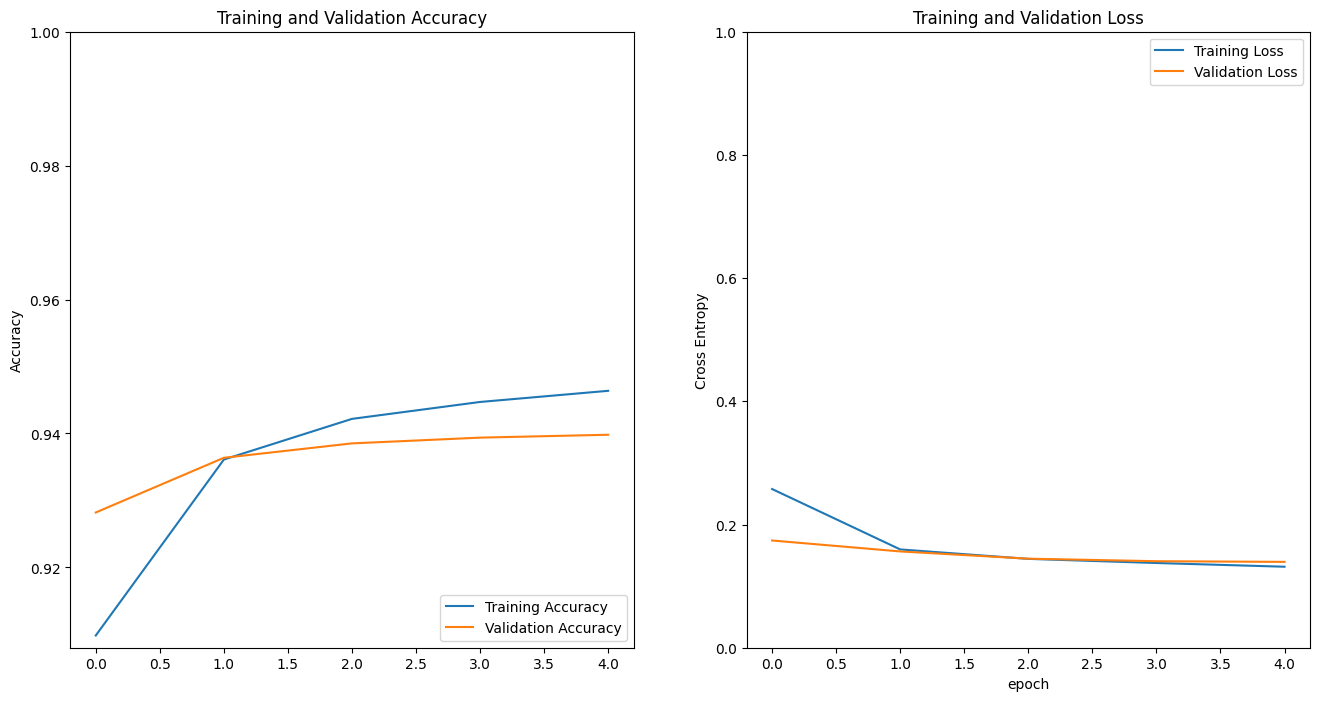

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

우리가 직접 만들었던 모델과는 다르게 시작부터 75%를 넘는 정확도에서 꾸준히 올라갈뿐더러 validation loss도 매우 안정적으로 학습됩니다.
역시, 잘 학습된 모델을 가져와서 쓰는 게 최고군요!

위에서 했던 것과 같이 또 32개의 test sample에 대한 예측 결과를 눈으로도 확인해 보겠습니다.
샘플을 test_batches에서 가져와서 예측 결과를 만들어보죠!

In [54]:
for image_batch, label_batch in test_batches.take(1):
    images = image_batch
    labels = label_batch
    predictions = model.predict(image_batch)
    pass

predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[9.99990106e-01, 9.89395539e-06],
       [1.83629781e-01, 8.16370189e-01],
       [3.57748508e-01, 6.42251432e-01],
       [9.99994397e-01, 5.59354339e-06],
       [9.98670340e-01, 1.32963667e-03],
       [9.88340855e-01, 1.16591752e-02],
       [2.70731718e-04, 9.99729216e-01],
       [7.20773637e-01, 2.79226363e-01],
       [9.72426295e-01, 2.75736954e-02],
       [9.72452998e-01, 2.75470372e-02],
       [1.49585292e-04, 9.99850392e-01],
       [9.99952316e-01, 4.76555069e-05],
       [9.92949128e-01, 7.05082668e-03],
       [1.74174547e-05, 9.99982595e-01],
       [9.98847127e-01, 1.15289935e-03],
       [9.84551609e-01, 1.54483579e-02],
       [9.54567134e-01, 4.54328991e-02],
       [1.95231244e-01, 8.04768682e-01],
       [9.59088624e-01, 4.09114473e-02],
       [1.11778276e-08, 1.00000000e+00],
       [9.99652863e-01, 3.47094727e-04],
       [9.99859571e-01, 1.40405115e-04],
       [9.84400213e-01, 1.55997863e-02],
       [4.65357431e-07, 9.99999523e-01],
       [9.997362

역시 0과 1 사이의 값으로 확률값을 출력하였습니다.

이번에도 prediction 값들을 실제 추론한 라벨(고양이:0, 강아지:1)로 변환해 보겠습니다.

In [55]:
import numpy as np
predictions = np.argmax(predictions, axis=1)
predictions

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

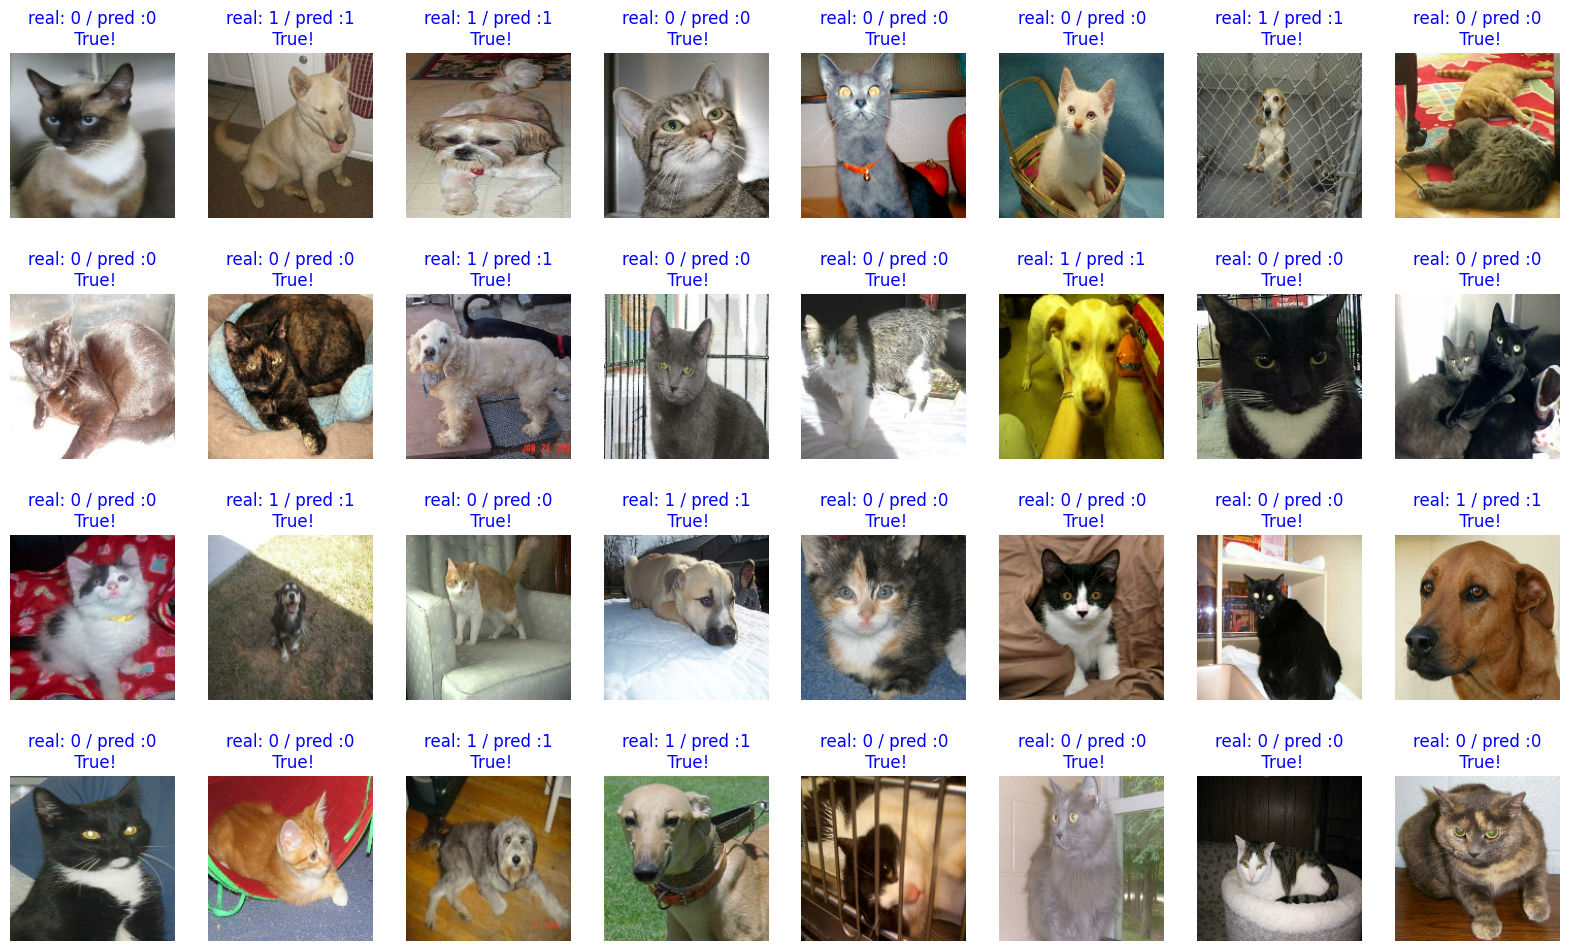

In [56]:
plt.figure(figsize=(20, 12))

for idx, (image, label, prediction) in enumerate(zip(images, labels, predictions)):
    plt.subplot(4, 8, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    correct = label == prediction
    title = f'real: {label} / pred :{prediction}\n {correct}!'
    if not correct:
        plt.title(title, fontdict={'color': 'red'})
    else:
        plt.title(title, fontdict={'color': 'blue'})
    plt.axis('off')

In [57]:
count = 0
for image, label, prediction in zip(images, labels, predictions):
    correct = label == prediction
    if correct:
        count = count + 1

print(count / 32 * 100) # 약 95% 내외

100.0


모델을 save 하고, 다시 load 해와서 사용하는 방법 익히기
자, 이제 우리가 많은 시간과 노력을 들여서 모델을 학습시켰으니, 저장하는 법을 알아보겠습니다.

열심히 학습시켜서 한 번만 쓰기에는 아까우니까요! 저장해두고 언제든 다시 쓸 수 있다면 좋겠죠.

모델을 저장하는 법은 생각보다 아주 간단하답니다!
다음과 같이 save_weights 함수를 활용합니다. 파라미터로 저장하고 싶은 경로만 입력해주면 되죠!

다음과 같이 ./checkpoint/checkpoint 라는 경로로 저장하게 되면 현재 위치에 있는 checkpoint라는 폴더 내에 checkpoint라는 파일명으로 저장됩니다.
단, checkpoint 폴더가 존재하지 않는다면 에러가 발생하므로, 다음과 같이 터미널을 열어 해당 폴더를 만들어주는 것이 안전합니다.
물론 다른 경로에, 다른 이름으로 저장해도 됩니다!

In [ ]:
!mkdir -p ~/aiffel/cat_vs_dog/checkpoint
!mkdir -p ~/aiffel/cat_vs_dog/images

In [59]:
import os

checkpoint_dir = "H:\\내 드라이브\\datasets\\cats_vs_dogs\\cats_vs_dogs\\checkpoint"
checkpoint_file_path = os.path.join(checkpoint_dir, 'checkpoint')

if not os.path.exists('checkpoint_dir'):
    os.mkdir('checkpoint_dir')
    
model.save_weights(checkpoint_file_path)     # checkpoint 파일 생성

if os.path.exists(checkpoint_file_path):
  print('checkpoint 파일 생성 OK!!')

ValueError: The filename must end in `.weights.h5`. Received: filepath=H:\내 드라이브\datasets\cats_vs_dogs\cats_vs_dogs\checkpoint\checkpoint

학습된 모델에 원하는 이미지를 입력해 예측 결과 확인해 보기
자, 이제 드디어 마지막 단계입니다!
우리는 강아지와 고양이를 분류하는 모델을 학습시켰죠. 그렇다면 여기에 우리가 원하는 이미지를 넣어서 예측을 시켜볼 수도 있을까요?!

물론 가능합니다! 원하는 이미지를 저장해서 모델의 예측 결과를 확인하는 실습을 해 보도록 하겠습니다.
여러분은 어떤 이미지를 모델에게 입력해 보고 싶은가요?

프리픽(Freepik)에서 구해온 강아지와 고양이의 이미지를 넣어보도록 하겠습니다. 잘 맞출지, 기대가 되는군요! 아래 명령어를 통해 준비된 이미지를 연결해 주세요.

In [ ]:
!ln -s ~/data/* ~/aiffel/cat_vs_dog/images/

이미지 파일이 준비 되었다면, 이제 tensorflow 모델에 입력해주기 위해 load_img, img_to_array 함수를 가져오도록 하겠습니다.






In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

이제 이미지를 가져와보죠!
단, 우리의 모델은 위에서 설정했다시피 (160, 160) 사이즈만 입력받을 수 있기 때문에 파라미터로 이미지 사이즈를 넣어주어야 합니다.

In [ ]:
IMG_SIZE = 160
img_dir_path = os.getenv("HOME") + "/aiffel/cat_vs_dog/images"
dog_image_path = os.path.join(img_dir_path, 'my_dog.jpg')

dog_image = load_img(dog_image_path, target_size=(IMG_SIZE, IMG_SIZE))
dog_image

네, 이미지도 잘 가져왔고, 사이즈도 적당히 맞춰진 것 같군요!
그러면 이제 모델에 넣을 수 있도록 이미지를 array, 즉 배열 자료형으로 변환해주겠습니다.

In [ ]:
dog_image = img_to_array(dog_image).reshape(1, IMG_SIZE, IMG_SIZE, 3)
dog_image.shape

위에서 많이 사용했던 이미지 데이터의 shape와 같죠? 다만, 이번에는 이미지가 단 한 장이니 맨 앞의 숫자가 1이 됩니다.

그러면 이미지를 모델에 넣어 예측해볼까요?!
고양이라면 [1.0, 0.0], 강아지라면 [0.0, 1.0]에 가까운 확률 분포가 예측될 것입니다. 결과는 어떨까요?

In [ ]:
prediction = model.predict(dog_image)
prediction

강아지일 확률이 아주 확고한 1.0이군요. 너무 쉬운가봅니다.

위의 과정을 함수로 만들어 원하는 이미지를 자유자재로 예측해 보도록 하겠습니다.

### 아래와 같이 함수를 짜두면 filename만 바꾸어 원하는대로 실험해볼 수 있습니다.



In [ ]:
def show_and_predict_image(dirpath, filename, img_size=160):
    filepath = os.path.join(dirpath, filename)
    image = load_img(filepath, target_size=(img_size, img_size))
    plt.imshow(image)
    plt.axis('off')
    image = img_to_array(image).reshape(1, img_size, img_size, 3)
    prediction = model.predict(image)[0]
    cat_percentage = round(prediction[0] * 100)
    dog_percentage = round(prediction[1] * 100)
    print(f"This image seems {dog_percentage}% dog, and {cat_percentage}% cat.")

강아지 이미지를 함수에 넣어봅시다.






In [ ]:
filename = 'my_dog.jpg'

show_and_predict_image(img_dir_path, filename)